# <div style="background-color:rgba(204, 229, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(0, 76, 153, 1);">PHYS 121 Lab #8</span></div>
# Faraday's Law \& Eddy Currents

***
## Learning Objectives:
* <b><span style="color:rgba(0, 153, 76, 1);"> Gain an understanding of the duality between magnetism and electricity as described by Ampère's law and Faraday's law.  </span></b>
* <b><span style="color:rgba(0, 153, 76, 1);"> Practice using the right hand rule to predict the outcome of experiments involving the electromagnetic force.   </span></b>

***
## Install & Import Required Packages:
Before starting, place your cursor in the code cell below and press 'Shift' + 'Enter'.  If the 'Check()' function reports that "All packages already installed", then proceed by first executing the second code cell that begins with: 
``` python
# Import the required modules.
```

If 'Check()' reports that some new packages have been installed, then go to File$\to$Log Out to complete log out of this notebook.  Then log in and execute the cell below again.

In [1]:
import installer
installer.Check()

In [1]:
# Import required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import httpimport
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import * 
with httpimport.remote_repo(['data_entry'], 'https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/modules'):
    import data_entry
with httpimport.remote_repo(['PHYS121'], 'https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/modules'):
    import PHYS121

***
## Introduction:

Depending on where you are in the lecture material, the following may be a review, or it may all be completely new to you. In either case, you should make an effort to understand it at least qualitatively. Electromagnetism can be unintuitive at times - this lab will help demonstrate a few principles from electromagnetism so that even if you think they are *strange*, you can at least trust that they are *true*.

Recall from last time that **Ampère's law** describes how electrical currents can produce magnetic fields. **Faraday's law** describes a complementary process by which magnetic fields can produce electrical currents. Mathematically, this is often expressed as follows:

\begin{equation}
\mathcal{E} = -\frac{d\Phi}{dt}
\label{eq:Bmag} \tag{1}
\end{equation}

where $\Phi$ is the **magnetic flux** through a closed conducting loop and $\mathcal{E}$ is the **electromotive force** or **emf** produced in the loop. 

The magnetic flux through a surface is the component of the magnetic field which is perpendicular to the surface. For general flat surfaces, $\Phi = BS\cos\varphi$, where $\varphi$ is the angle between the field and the vector normal to the surface. In Figure 1, we see 3 surfaces with the same surface area $S$ experiencing an identical uniform magnetic field $\vec{B}$. 
* Surface A is perpendicular to the field, so $\cos 0 = 1$ gives flux $\Phi_A = BS$.
* Surface B is at an angle $\theta$ to the field, so $\Phi_B = BS\cos\theta = BS_{\perp}$, where $S_{\perp}$ is the area of the projected surface shown above.
* Surface C is parallel with the field, so its normal vector is perpendicular to the field. Since $\cos 90 = 0$,  $\Phi_C = 0$

<br>
<p>
<center>
<img src="flux.png" style="width: 80%" />
<b>Fig. 1:  Although the surfaces A, B and C experience the same uniform magnetic field $\vec{B}$ and have the same surface area $S$, the flux $\Phi$ through each depends on their orientation with respect to the field. </b></center>
</p>

Now, if these surfaces were bounded by conducting loops, we would *still not* expect a current to be generated. This can be seen by looking at Eq. 1. The emf (which would produce a current) depends on the *time-rate of change* of the flux, not the flux itself. So if these surfaces were fixed in space and the field were constant, there would be no emf and hence no induced electrical current.

From the example in Fig. 1, we see that the flux $\Phi$ through a surface depends on the angle of that surface relative to the field. So one way to generate a current is to rotate a loop through a magnetic field. One could also rotate a set of permanent magnets in a stationary loop and obtain the same results. Incidentally, this is the basic idea behind many electrical generators: energy supplied by some mechanical energy (eg. water flowing under the force of gravity) or chemical energy (the combustion of fuel) drives a rotating set of permanent magnets (the rotor) which is housed in stationary conducting loops (the stator). By producing an emf, generators effectively convert transform different types of energy into electrical energy.

You should also make note of the negative sign in Eq. 1. This detail is often called **Lenz's Law**, frequently described by David J. Griffiths' quip "nature abhors a change in flux." A flow-chart might help you to understand this:

<br>
<p>
<center>
<img src="flowchart.png" style="width: 20%" />
</p>

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 1 - Magnetic Braking - Data Collection ()</span></div>

In the first part of this lab, you will explore one implication of Faraday's Law of induction. Consider the situation in Figure 2. A magnet slides along a copper plate at velocity $\vec{v}$. Since copper is a conductive material, any circle embedded in a copper sheet can be considered a conducting loop. Observe the orange loops in Fig. 2: on the left, the loop that the magnet is "leaving behind" experiences a decreasing magnetic flux, and so will produce a current in the indicated direction. On the right, the loop that the magnet is "approaching" experiences an increasing magnetic flux, creating a current in the opposite direction. These are called **eddy currents**.

<br>
<p>
<center>
<img src="eddy.png" style="width: 65%" />
<b>Fig. 2: Schematic diagram of the eddy currents and resulting magnetic fields produced by a magnet sliding along a copper sheet.  </b></center>
</p>

The resulting force acts opposite the direction of motion in a phenomenon known as **magnetic braking**. (Try running the magnet down the ramp by hand, you should feel the resistance!) We'll describe the total drag force on the magnet by the sum of magnetic braking and the more familiar kinetic friction. Since the rate of change of flux through a conducting loop will be proportional to the magnet's velocity, we write our total drag force as

\begin{equation}
F_{d} = -bv-\mu N
\label{eq:Fd} \tag{2}
\end{equation}

where $v$ is the velocity, $b$ is a constant of proportionality, $\mu$ is the coefficient of mechanical friction, and $N$ is the magnitude of the normal force. We can draw a free body diagram accounting for all of the major forces involved (Fig. 3) and solve our resulting equations of motion. If $s$ is the position of the magnet measured along the length of the ramp, we find that the position as a function of time $t$ is given by

\begin{equation}
s(t) = v_T\tau\left( \frac{t}{\tau} - 1 + \exp \left( -\frac{t}{\tau} \right)\right)
\label{eq:st} \tag{3}
\end{equation}

where $v_T$ is the the **terminal velocity** and $\tau$ is the **time constant**:

\begin{equation}
v_T = \frac{mg\sin\theta - \mu mg\cos\theta}{b} \ \ \ \ \ \ \  \ \ \ \ \ \  \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \tau = \frac{m}{b}
\label{eq:vt} \tag{4}
\end{equation}


<br>
<p>
<center>
<img src="fbd.png" style="width: 65%" />
<b>Fig. 3: Free-body diagram for the magnet sliding down a copper ramp.  </b></center>
</p>

***
**<span style="color:blue">Question 1.1:</span>**  

What would you expect a graph of $s(t)$ to look like while the magnet is *approaching* terminal velocity? If you're having trouble working this out from Eq.3, use your intuition, and then refer back to the equation to make your statement more precise.

***
**<span style="color:blue">Answer 1.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

**<span style="color:blue">Question 1.2:</span>**  

Describe the expected shape of the graph of $s(t)$ *after* the magnet has reached terminal velocity.

***
**<span style="color:blue">Answer 1.2:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

On your table, you'll find magnet and a ramp with three copper tracks. Theres is also enough space between two of the tracks to slide the magnet freely down the track without any magnetic braking. Referring to Figure 4, these tracks are:
* A ~ 0.006" copper strip
* B ~ Plastic track
* C ~ 0.021" copper strip
* D ~ 0.0625" (1/16") copper strip



<br>
<p>
<center>
<img src="ramps.png" style="width: 65%" />
<b>Fig. 4: Materials for Part 1 of this lab. Left: top and bottom of the permanent magnet. The top has a dot to facilitate video tracking, and the bottom is coated in teflon to reduce kinetic friction. Right: ramp with four tracks labelled A-D, described above.  </b></center>
</p>

**<span style="color:blue">Question 1.3:</span>**  

We have introduced an unknown parameter $b$ into our drag force equation. This will scale the strength of magnetic braking - if $b$ is larger, the effect will be stronger. From largest to smallest, rank tracks A through D in terms of the expected relative values of $b$. Briefly explain your choice.

***
**<span style="color:blue">Answer 1.3:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

Using the provided phone, you will record the magnet sliding down each of these tracks. **In order to accurately track the magnet's motion, you will need to adjust the camera to its slow motion setting.** 

<br>
<p>
<center>
<img src="slomo.jpg" style="width: 25%" />
<b>Fig. 5: With the camera app opened, scroll to the "More" tab to switch to the slow motion setting.  </b></center>
</p>

Before filming, ensure that the phone is oriented parallel to the ramp and that you've maximized the region of the ramp in view of the camera. You wil record 4 separate videos and then upload them to the desktop computer at your station. The following steps will guide you through using Tracker to collect data from your videos. 

1. Move your videos from the DCIM folder to the home drive (H:)
2. Open Tracker. For each of your recordings, complete steps 4 - 11 below
3. Click File -> Import -> Video... and navigate to the appropriate folder to import your video
4. The video will probably be oriented in the wrong way. To fix this, Right-click on video -> Filters -> New -> Rotate 
5. To set the frame-rate, click Video -> Clip Settings... and change the framerate for 30FPS to 240FPS.
6. Find the first frame of the video after the magnet was released. You can click and drag the scrollbar or use Ctrl+mouse wheel to move through the frames. Take note of the frame number, and then move the left-hand black arrow to this frame. 
<br>
<p>
<center>
<img src="scrollbar.png" style="width: 60%" />
    <br>
<b>Fig. 6: Scrollbar before and after steps 6 and 7. The black arrows on the bottom bound the segment that you want to measure.  </b></center>
</p>
7. Do the same thing for the last frame before the magnet makes contact with the bottom of the ramp (or goes out of view) and the right-hand black arrow. Now Tracker will only consider the selected set of frames. Click the black return arrow on the left side of the scroll bar to return to the first marked frame.
<br>
<p>
<center>
<img src="toolbar.png" style="width: 60%" />
    <br>
<b>Fig. 7: Guide to the icons used in steps 8, 9, and 10.  </b></center>
</p>
8. Place your axes so that the origin is at the centre of your magnet in the first frame. Rotate the axes so that the magnet will be sliding in the positive x-direction.
9. To set the length scale, press the calibration icon, then New -> Calibration Stick. Click and drag the calibration stick to align it with the orange ruler on your ramp and set the distance to 0.150m. (For added precision, use the mouse wheel to zoom in and out)
<br>
<p>
<center>
<img src="autotracker.png" style="width: 60%" />
    <br>
<b>Fig. 8: To set up the autotracker, you'll need to define both the template and the search region.  </b></center>
</p>
10. Now set up your tracker. Click Track -> New -> Point Mass and then open the auto-tracker. On the first frame, Shift-Ctrl-Click the centre of your magnet. The inner circle is the "template" - this is what the auto-tracker will look for as the frames advance. It should be large enough to show a clear distinction between the black dot and the pink tape. The outer square is the area in which the auto-tracker will look for a match to the initial template. If your magnet is going very fast by the end of the video, or if the lighting changes abruptly, autotracker may lose sight of the dot. If the suggested mark is accurate, you can press "Accept" to continue. If it isn't, you can manually mark the problem frames using Shit+Click or define a new template entirely using Shift+Ctrl+Click. Another option is to increase the "Evolve" value: Tracker updates the template after each new frame by superposing the old template with the new matches. By increasing "Evolve", you permit more drastic updates. Be careful not to do this unless absolutely necessary, as it may cause inaccuracies. 
11. Click File -> Export -> Data... and change "Number Format" to "Full Precision", "Delimiter" to "Comma", and "Columns" to "t,x" (*make sure you had your axes set appropriately at the beginning of the video! It's not too late to rotate them so that the trajectory is along the positive x-axis*). Once you've exported the .txt file, move it to the same folder as this notebook.
12. Click File -> New Tab and repeat.



# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 2 - Magnetic Braking - Data Analysis ()</span></div>

In the code blocks below, use the provided templates to import your data as spreadsheets. The file path for your .txt file should be written in place of trkX.txt in the first line of each cell. Click the "Generate Vectors" button once the spreadsheet has been created.

In [6]:
# Import data for Track A
trkA = pd.read_csv("trkA.txt", skiprows=2, header = None, names=["t","x"])
print(trkA)

            t         x
0    0.000000  0.000339
1    0.004167  0.001291
2    0.008333  0.002138
3    0.012500  0.003010
4    0.016667  0.003830
..        ...       ...
156  0.650000  0.445534
157  0.654167  0.449522
158  0.658333  0.454557
159  0.662500  0.458628
160  0.666667  0.463298

[161 rows x 2 columns]


In [7]:
# Import data for Track B
trkB = pd.read_csv("trkB.txt", skiprows=2, header = None, names=["t","x"])
print(trkB)

            t         x
0    0.000000  0.000423
1    0.004166  0.000796
2    0.008331  0.001589
3    0.012497  0.002329
4    0.016662  0.002969
..        ...       ...
121  0.504031  0.453990
122  0.508196  0.461399
123  0.512362  0.468467
124  0.516527  0.476882
125  0.520693  0.483284

[126 rows x 2 columns]


In [8]:
# Import data for Track C
trkC = pd.read_csv("trkC.txt", skiprows=2, header = None, names=["t","x"])
print(trkC)

            t         x
0    0.000000 -0.000129
1    0.004167  0.000313
2    0.008333  0.000949
3    0.012500  0.001493
4    0.016667  0.002188
..        ...       ...
562  2.341667  0.448871
563  2.345833  0.449531
564  2.350000  0.450601
565  2.354167  0.451414
566  2.358333  0.452101

[567 rows x 2 columns]


In [11]:
# Import data for Track D
trkD = pd.read_csv("trkD.txt", skiprows=2, header = None, names=["t","x"])
print(trkD)

            t         x
0    0.000000  0.000129
1    0.004167  0.001321
2    0.008333  0.004815
3    0.012500  0.006905
4    0.016667  0.010452
..        ...       ...
876  3.650000  1.683408
877  3.654167  1.685036
878  3.658333  1.686684
879  3.662500  1.689854
880  3.666667  1.691903

[881 rows x 2 columns]


In [12]:
# I set the calibration stick in the right place but forgot to change the value.

trkD["x"] *= 0.15
print(trkD)

            t         x
0    0.000000  0.000019
1    0.004167  0.000198
2    0.008333  0.000722
3    0.012500  0.001036
4    0.016667  0.001568
..        ...       ...
876  3.650000  0.252511
877  3.654167  0.252755
878  3.658333  0.253003
879  3.662500  0.253478
880  3.666667  0.253785

[881 rows x 2 columns]


Consider Eq. 3 once more. It shows exponential behaviour in the approach to terminal velocity:

\begin{equation}
s(t) = v_T\tau\left( \frac{t}{\tau} - 1 + \exp ( -t/\tau ) \right)
\label{eq:stag} \tag{5}
\end{equation}

It's common practice to consider *limiting cases*. What happens when our parameter $\tau = m/b$ is very large or very small? Recall that

\begin{equation}
v_T  = \tau g\left( \sin\theta - \mu \cos\theta \right) 
\end{equation}

In the limit $\tau \to \infty$ ($m >> b$ or $b \to 0$) it can be shown that the behaviour is quadratic, which is what we expect for an object experiencing the force of gravity alone:

\begin{equation}
\lim\limits_{\tau\to\infty}s(t) = \frac{1}{2} gt^2 \left( \sin \theta - \mu \cos \theta \right)
\label{eq:b0} \tag{6}
\end{equation}

At the opposite extreme, as $\tau \to 0$ ($b >> m$ or $b \to \infty$) we see that $s(t)$ is linear, suggesting that terminal velocity is reached almost instantly when the magnetic braking is strong relative to the force of gravity:

\begin{equation}
\lim\limits_{\tau\to 0}s(t) = v_Tt
\label{eq:blrg} \tag{7}
\end{equation}

**<span style="color:blue">Question 2.1:</span>**  
Answer the following questions based on the discussion above and your observations during the experiment. As always, explain your answers. 


&nbsp;&nbsp; (a) For which tracks (if any) do you expect Eq. 7 to be appropriate? 
 
&nbsp;&nbsp; (b) For which tracks (if any) do you expect Eq. 6 to be appropriate?

&nbsp;&nbsp; (c) For which tracks (if any) do you expect *neither* approximation to be appropriate?

***
**<span style="color:blue">Answer 2.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

The following code cell contains three templates for you to use: a linear fit, a power law fit, and a fit designed specifically for Eq. 5. 

In [ ]:
# Linear fit template. 
m, b, dm, db, fig = PHYS121.LinearFit(xdata, ydata, xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '')

# Power law fit template.
A, N, C, dA, dN, dC, fig = PHYS121.PowerLaw(xdata, ydata, xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '')

# Eq. 5 fit template.
v_T, tau, dv_T, dtau, fig = PHYS121.Braking(xdata, ydata, xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '')

**<span style="color:blue">Question 2.2:</span>**  

Four code cells and four markdown cells have been provided below. Use the templates to perform a fit for each of your four datasets, choosing appropriate units and axis labels and comment on each of the results. You're welcome to try multiple fits on a dataset and take the one that provides the *simplest* result without sacrificing accuracy (after all, one can always make a fit better by introducing more parameters, but that isn't always desirable!).  If you find that your results contradict your answers from Question 2.1, comment on this fact in the provided markdown box: you won't be docked marks for realizing and acknowledging that your initial assumption was incorrect - this is simply part of the process.

$y = v_\mathrm{T}\tau\left[\dfrac{x}{\tau} - 1 + e^{-x/ \tau}\right]$

This is an **UNWEIGHTED** fit.

,,Value,Units
Terminal Velocity,$v_\mathrm{t} =$,0.889+/-0.011,m/s
Time Constant,$\tau =$,0.1636+/-0.0051,m


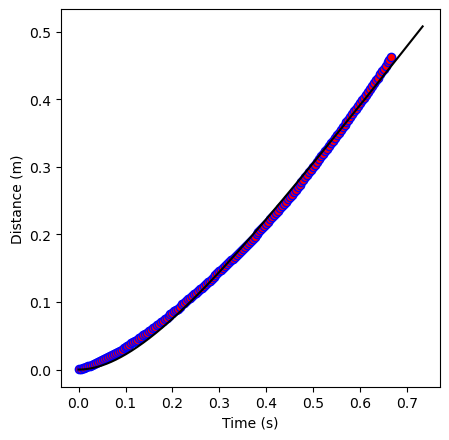

In [13]:
# Track A 
v_T, tau, dv_T, dtau, fig = PHYS121.Braking(trkA["t"].to_numpy(), 
                                            trkA["x"].to_numpy(), 
                                            xlabel = 'Time', 
                                            ylabel = 'Distance', 
                                            xUnits = 's', 
                                            yUnits = 'm')

***
**<span style="color:blue">Answer 2.2(A):</span>** 

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell to comment on your results.
***

$y = A\,(x/1$ s$)^N\,+ \,C$

This is an **UNWEIGHTED** fit.

,,Value,Units
coefficient,$A =$,1.5212+/-0.0056,m
power,$N =$,1.7851+/-0.0052,
offset,$C =$,0.00500+/-0.00040,m


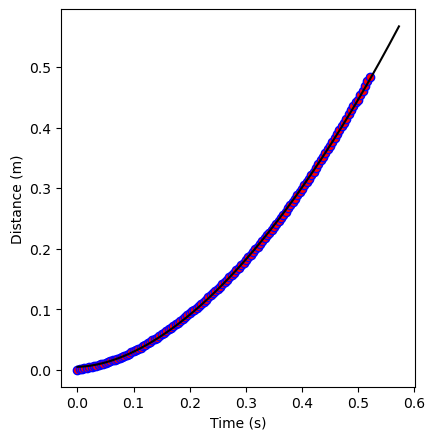

In [14]:
# Track B
A, N, C, dA, dN, dC, fig = PHYS121.PowerLaw(trkB["t"].to_numpy(), 
                                            trkB["x"].to_numpy(), 
                                            xlabel = 'Time', 
                                            ylabel = 'Distance', 
                                            xUnits = 's', 
                                            yUnits = 'm'
                                           )

***
**<span style="color:blue">Answer 2.2(B):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell to comment on your results.
***

$y = m\,x + b$

This is an **UNWEIGHTED** fit.

,,Value,Units
slope,$m =$,0.19009+/-0.00011,m/s
$y$-intercept,$b =$,0.00286+/-0.00014,m


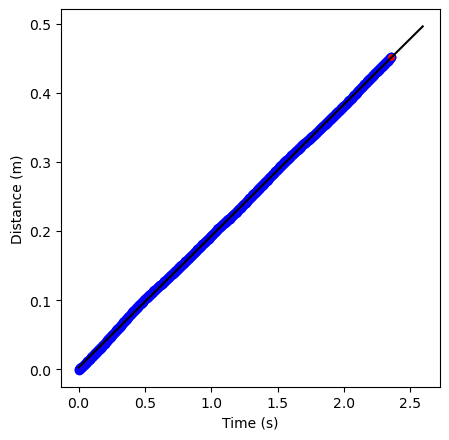

In [15]:
# Track C
mC, bC, dmC, dbC, fig = PHYS121.LinearFit(trkC["t"].to_numpy(), 
                                          trkC["x"].to_numpy(), 
                                          xlabel = 'Time', 
                                          ylabel = 'Distance', 
                                          xUnits = 's', 
                                          yUnits = 'm'
                                         )

***
**<span style="color:blue">Answer 2.2(C):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell to comment on your results.
***

$y = m\,x + b$

This is an **UNWEIGHTED** fit.

,,Value,Units
slope,$m =$,0.068578+/-0.000057,m/s
$y$-intercept,$b =$,0.00401+/-0.00012,m


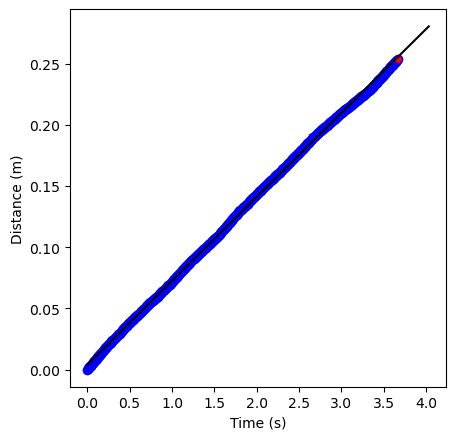

In [16]:
# Track D
mD, bD, dmD, dbD, fig = PHYS121.LinearFit(trkD["t"].to_numpy(), 
                                          trkD["x"].to_numpy(), 
                                          xlabel = 'Time', 
                                          ylabel = 'Distance', 
                                          xUnits = 's', 
                                          yUnits = 'm'
                                         )

***
**<span style="color:blue">Answer 2.2(D):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell to comment on your results.
***

**<span style="color:blue">Question 2.3:</span>**  

Based on your results, what can you say about the relative value of $b$ for each track? How does this compare to your answer from Question 1.3?

***
**<span style="color:blue">Answer 2.3:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 3 - Independent Investigation ()</span></div>

In this section, you and your partner will continue your investigation of magnetic braking independently. This is an opportunity to try to answer a nagging question you may have had while collecting data or to carry the analysis of your data forward. You might even just try something novel and attempt to interpret the results.

You might choose to

* collect more data by modifying other experimental parameters (such as $\theta$) and then perform the appropriate fits in Python to help you interpret your results
* perform additional analysis on the data you've already collected -- You might consider the equations for $s(t)$ and ask yourself what additional information you would need to determine numerical values for quantities of interest such as $\mu$ or $b$
* do something else entirely!

You must clearly explain your work and it should contain both qualitative and quantitative elements. Marks will be based on completion and effort. To help guide you, Part 3 has been broken into 3 subsections. Insert as many markdown and code cells as you need.

---
## Description of investigation

Describe briefly (but specifically) what you will be doing and explain what you expect to find. 

<br>
<br>
<br>

Further data analysis

---
## Analysis / Results 

Perform your analysis and report your final results here. 

<br>
<br>
<br>

In [13]:
# Angle of the ramp:
theta = np.radians(31)

# Determination of the coefficient of kinetic friction from the data from Track B:
mu = np.tan(theta) - 2*A / (9.81 * np.cos(theta))

print(f"Coefficient of kinetic friction: {mu}")

Coefficient of kinetic friction: 0.23861159401553494


In [14]:
# Mass of magnet in grams:
mass = 22.37

# Coeff on v_T:
C = 9.81 * (np.sin(theta) - mu * np.cos(theta)) 
print(C)

# Calculation of b from the fit & calculation from v_T & mu
b0 = mass / tau
b1 = (C / v_T) * mass

print(f"The value of b from the fit was {b0} and the value obtained from the analysis was {b1}")

3.0460836659145074
The value of b from the fit was 136.76452417114209 and the value obtained from the analysis was 76.6721519494412


In [15]:
# Determination of b for tracks C and D using the mass and the cooeficient of kinetic friction

bC = (C / mC)*mass
bD = (C / mD)*mass

print(f"b for track C: {bC} \nb for track D: {bD}")


b for track C: 358.4869055000127 
b for track D: 993.736594960627


---
## Conclusions

Summarize the results of your investigation and comment on the results.

<br>
<br>
<br>

Obtained quite different results for b from the fit and from the calculation of mu. Kinetic friction is pretty unreliable at best, so... no sweat, really. Although it might be worth double-checking that the fit computes tau correctly when given a precise dataset...

$y = v_\mathrm{T}\tau\left[\dfrac{x}{\tau} - 1 + e^{-x/ \tau}\right]$

This is an **UNWEIGHTED** fit.

,,Value
Terminal Velocity,$v_\mathrm{t} =$,1.00000000000000022+/-0.00000000000000022
Time Constant,$\tau =$,10.0000000000000036+/-0.0000000000000029


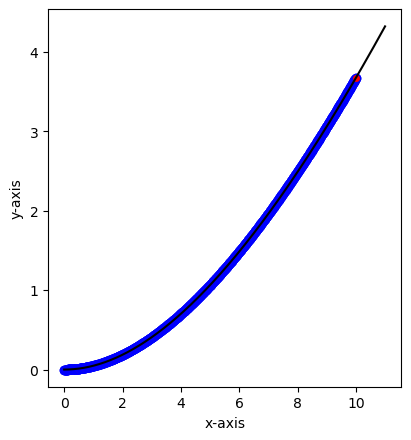

In [16]:
def func(x, tau):
    return tau*(x/tau - 1 + np.exp(-x/tau))

xrange = np.arange(0,10,0.01)
dset = func(xrange, 10)


v_T, tau, dv_T, dtau, fig = PHYS121.Braking(xrange, dset)

There ya have it. Could just have something to do with that decidedly non-quadratic power law fit that I ended up with on track B

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 4 - Cathode Ray Tubes ()</span></div>

Prior to the invention of liquid crystal displays (LCDs), **cathode ray tubes** (or **CRT**s) were the primary component in television sets. These simple devices were once ubiquitous - in fact, the first invention that might be recognized as a video game was the *cathode ray amusement device*, [patented in 1948 by Thomas Goldsmith](https://www.popularmechanics.com/culture/gaming/a20129/the-very-first-video-game/). CRTs also have a profound legacy within physics -- experiments with cathode ray tubes led to the 1897 discovery of the electron by JJ Thomson. This discovery and a few other puzzling experimental and theoretical developments from the late 19th century would eventually culminate in the quantum revolution of the 1920s. 

Figure 5 shows a simplified diagram of a cathode ray tube. A tungsten heating element (much like the filament of an incandescent lightbulb) is used to heat up a nearby cathode, typically made from barium carbonate. A voltage source creates a slight excess of electrons in the cathode. Their kinetic energy increases with temperature until the most energetic electrons are released from the cathode in a process called **thermionic emission**. Any change in the charge of the cathode from the emission of electrons is effectively neutralized by the voltage source.

The emitted cloud of electrons is concentrated into a beam and accelerated by an electric field. Magnetic fields established by deflecting coils may be used to deflect the beam as it is fired towards a phosphorescent screen which begins to glow a dull green. 


<br>
<p>
<center>
<img src="crt.png" style="width: 65%" />
<b>Fig. 9: Simplified diagram of a cathode ray tube. Note that phosphorence is the same phenomenon exploited by glow-in-the-dark materials.  </b></center>
</p>

There will be stations in the lab room with CRTs, solenoids, and bar magnets. You are free to experiment with these, and you should attempt to predict what will happen before you try different things. Recall that

\begin{equation}
\vec{F}_B = q \vec{v} \times \vec{B} 
\label{eq:force} \tag{8}
\end{equation}

for a charge $q$ moving with velocity $\vec{v}$ through a magnetic field $\vec{B}$. Recall also that the **right-hand rule** tells you how to determine the direction of the cross product of two vectors:

<br>
<p>
<center>
<img src="rhr.png" style="width: 35%" />
<b>Fig. 10: The right-hand rule for determining a cross product of two vectors. From <a href="https://commons.wikimedia.org/wiki/File:Right_hand_rule_cross_product.svg">Wikimedia Commons</a>, licenced under <a href="https://creativecommons.org/licenses/by-sa/3.0/legalcode" rel="license">CC BY-SA 3.0</a>.  </b></center>
</p>


The following questions are purely qualitative and require no calculations, but you still must explain as specifically as possible *why* one would expect the observed behaviour. 

**<span style="color:blue">Question 4.1:</span>**  

Bring the bar magnet towards the CRT as shown:

<br>
<p>
<center>
<img src="crtmag1.png" style="width: 19%" />
</center>
</p>

What (if anything) will happen to the beam of electrons, as shown by the dot on the phosphorescent screen?

***
**<span style="color:blue">Answer 4.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

**<span style="color:blue">Question 4.2:</span>**  

<br>
<p>
<center>
<img src="crtmag2.png" style="width: 25%" />
</center>
</p>

If you bring the bar magnet in from the side (as in the figure above) what happens? (Hint: try picturing the magnetic field lines around the bar magnet) 

***
**<span style="color:blue">Answer 4.2:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

**<span style="color:blue">Question 4.3:</span>**  

Now consider the solenoids on either side of the CRT. Take note of how they are plugged into the power source and determine the direction of the current. Given what you know about the magnetic field produced by a solenoid, in which direction would the magnetic field point if you were to turn on the current?

***
**<span style="color:blue">Answer 4.3:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

**<span style="color:blue">Question 4.4:</span>**  

Turn on the solenoids. What happens? Is this what you expect? Why or why not? 

***
**<span style="color:blue">Answer 4.4:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 5- Reflection & statement of contributions (25 minutes)</span></div>

Questions 5.1 and 5.2 are used to reflect on the learning objectives stated at beginning of the notebook. 
***
**<span style="color:blue">Question 5.1:</span>**  

It might be tempting to think of the phenomenon of magnetic braking as something akin to a weak magnet sliding down your fridge door. But this isn't the case at all! Copper is a **diamagnetic** material and will not attract ferromagnets, so something very different is happening. Based on what you've learned today and in class, how can we explain magnetic braking?

***
**<span style="color:blue">Answer 5.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

**<span style="color:blue">Question 5.2:</span>**  

Equation 1 (Faraday's law) states that a *changing* magnetic flux induces an electromotive force. Recount your observations from Question 4.4 and note that the magnetic field through each fixed point in space is *constant* a short time after turning the solenoids on. Explain why your observations do *not* contradict Faraday's law.


***
**<span style="color:blue">Answer 5.2:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***
Below, you will briefly summarize the contributions that you and your partner made when completely this lab.  Please ensure that both partners have a chance to engage in all types of lab activities (developing the experimental methods/data collection strategies, hands-on interaction with the apparatus/data collection, and data processing/analysis in the Jupyter notebook).  Note that statements of contributions are common in science.  The figure below shows one example taken from a 2021 paper published in the journal *Nature Physics*.

<p>
<center>
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab1/images/contributions.jpg" alt="image info" style="width: 60%; height: auto;" /><br>
<b>Fig. 4: A sample statement of author contributions from a recent journal article.</b></center>
</p>

***
**<span style="color:blue">Question 5.3(a):</span>**  

Answer this question only if you worked with a partner to complete this lab.

In two or three sentences describe the specific contributions of **Partner A** to this lab.  For example, worked with the experimental apparatus to collect data for Part 1 of the lab, entered and processed the data in the Jupyter notebook for Part 2 of the lab, ...

***
**<span style="color:blue">Answer 5.3(a):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  Please start be entering the name and student number of **Partner A**.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***
**<span style="color:blue">Question 5.3(b):</span>**  

Answer this question only if you worked with a partner to complete this lab.

In two or three sentences describe the specific contributions of **Partner B** to this lab.  

***
**<span style="color:blue">Answer 5.3(b):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  Please start be entering the name and student number of **Partner B**.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***
**<span style="color:blue">Question 5.4:</span>**  

We welcome your feedback on the PHYS 121 labs!  Please feel free to include any comments you have about this lab in the cell below.  Your comments will be taken into consideration when revising/improving the PHYS 121 labs.  You can suggest improvements, point out anything that was unclear, comment on the strengths and weaknesses of the lab, ...

This question is optional and will have no impact on your lab grade.

***
**<span style="color:blue">Answer 5.4:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 6 - Playground (optional)</span></div>

Feel free to add as many cells as you like below and use them as a playground for further independent investigations.  These cells won't be graded, so feel free to use them in any way that you like.  

In [ ]:
# Here's an empty code cell that you can use.  

In [ ]:
# Here's another empty code cell that you can use.

In [ ]:
# Here's yet another empty code cell that you can use.  
# If you need more, you can add cells using the '+' icon in the menu bar at to the top of the screen.